In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Path of Opto - skeleton network

path = r'Y:\DLC\ACC_DMS_nphr_skeleton_body-acb-2020-09-17'
os.chdir(path)

In [3]:
#Dataframe of skeleton network 

df = pd.DataFrame(np.load('file_names.npy'), columns = ['video'])
df['skel - uncertain'] = np.load('uncertain.npy') * 100
df['skel - jump'] = np.load('jump.npy') * 100
df['skel - fitting'] = np.load('fitting.npy') * 100

In [4]:
#Path of Opto - no skeleton network

path = r'Y:\DLC\ACC_DMS_nphr_noskel-acb-2020-09-21'
os.chdir(path)

In [5]:
#Dataframe of no skeleton network 

df2 = pd.DataFrame(np.load('file_names.npy'), columns = ['video'])
df2['no skel - uncertain'] = np.load('uncertain.npy')*100
df2['no skel - jump'] = np.load('jump.npy')*100
df2['no skel - fitting'] = np.load('fitting.npy')*100

In [6]:
#Add no skeleton columns to skeleton dataframe 

df['no skel - uncertain'] = df2['no skel - uncertain'] 
df['no skel - jump'] = df2['no skel - jump']
df['no skel - fitting'] = df2['no skel - fitting']

In [7]:
#dataframes of different extraction methods 

df4 = df[['skel - uncertain', 'no skel - uncertain']]
df5 = df[['skel - jump', 'no skel - jump']]
df6 = df[['skel - fitting', 'no skel - fitting']]

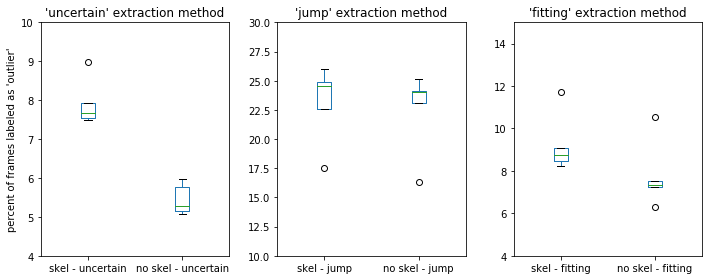

In [8]:
path = r'C:\Users\acbandi\Desktop'
os.chdir(path)

#figure - boxplot showing the distrbutions of percent outlier for each extraction method 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))

df4.plot.box(ax=ax1, ylim=(4,10), figsize=(10,4))
ax1.set_title("'uncertain' extraction method")
ax1.set_ylabel("percent of frames labeled as 'outlier'")

df5.plot.box(ax=ax2, ylim=(10,30), figsize=(10,4))
ax2.set_title("'jump' extraction method")

df6.plot.box(ax=ax3, ylim=(4,15), figsize=(10,4))
ax3.set_title("'fitting' extraction method")

fig.tight_layout()
plt.savefig('outliers.png', dpi=100)
plt.show()